In [3]:
# Thomas Glucksman
# AMATH 584 Homework 3, QR conditioning
# Due 10/30/20

import matplotlib.pyplot as plt
import numpy as np
import os

# plot parameters
plt.rcParams['figure.figsize'] = [5,5]

In [58]:
# I. Develop a numerical algorithm that implements the modified Gram-Schmidt orthogonalization procedure.
# Compare your algorithm to (i) the qrfactor.m code that we built in class (you can download it from the
# third lecture on QR on the website), and (ii) MATLAB’s QR algorithm on a variety of matrices to see how
# well your algorithm works. Be sure to try it on a matrix that is ill-conditions, i.e. cond(A) >> 1.


In [59]:
# Implement modified Gram-Schmidt
 def MGS(A):
     
    # get dimensions of A
    m = A.shape[0]
    n = A.shape[1]

    # initialize R and Q
    R = np.zeros(shape = A.shape)
    Q = np.zeros(shape = A.shape)
    
    # do MGS
    # create array of vectors v
    v = np.zeros(A.shape)

    # set columns of v to be columns of A
    for i in np.arange(n):
        v[:,i] = A[:,i]
     
    for i in np.arange(n):
        
        # take 2-norm of v[,i] and set it as i-th diagonal term of R
        R[i,i] = np.linalg.norm(v[:,i], ord = 2)

        # normalize v[,i], set as Q[,i]
        Q[:,i] = v[:,i]/R[i,i]

        # make all other columns v[,j] normal to v[,i]
        for j in np.arange(i+1,n):

            R[i,j] = np.dot(Q[:,i], v[:,j])
            v[:,j] = v[:,j] - R[i,j]*Q[:,i]
      
    return Q,R
            

In [90]:
# Now test our implementation of MGS on a variety of matrices
from time import time
from scipy.linalg import hilbert
# First test numerical precision for well-conditioned matrices
# We will consider well conditioned to be cond(A) within 0-10e2 and ill-conditioned to be cond(A) > 10e6

# For each set of trials, we will 
#   1) time the implementation and 
#   2) Compute relative error for Q*Q^T E = ||I - Q*Q^T||/||Q*Q^T||
#       Since Q is unitary, Q*Q^T should closely approximate I

def testMGS(trials, size, wc):
    print("=================================")
    print(f"Testing {size} x {size} matrices:")
    print("=================================")
    for i in np.arange(trials):
        
        if wc == True:
            A = np.random.rand(size,size)
        else:
            A = np.random.randint(low = 0, high =5, size = (size,size))*0.0000000001 - hilbert(size)
        condition = np.linalg.cond(A)
        t0 = time()
        Q,R = MGS(A)
        t1 = time()

        I = np.eye(size)
        result = np.linalg.norm(I - np.matmul(Q, Q.transpose()), ord = 2)/np.linalg.norm(np.matmul(Q, Q.transpose()))
        print(f"relative error = {result}, runtime = {t1-t0} seconds, cond(A) = {condition}")




In [69]:

# We run 3x10 trials, increasing the size of the matrices each time. In each set of trials, the condition number of the matrix increases
# Well-conditioned
testMGS(trials = 10, size = 10, wc=True)
testMGS(trials = 10, size = 100, wc= True)
testMGS(trials = 10, size = 500, wc=True) 

Testing 10 x 10 matrices:
relative error = 1.457604965139225e-15, runtime = 0.001007080078125 seconds, cond(A) = 216.30272997186626
relative error = 4.284162189768412e-16, runtime = 0.0009984970092773438 seconds, cond(A) = 45.629031300596615
relative error = 9.74996570870755e-16, runtime = 0.0 seconds, cond(A) = 73.75459097508255
relative error = 3.1169806010068586e-15, runtime = 0.00099945068359375 seconds, cond(A) = 124.50672032101606
relative error = 3.647121407464375e-16, runtime = 0.0009946823120117188 seconds, cond(A) = 18.696657581408957
relative error = 2.953881776367596e-15, runtime = 0.0010113716125488281 seconds, cond(A) = 281.79337619304226
relative error = 9.616503872369611e-16, runtime = 0.0009694099426269531 seconds, cond(A) = 126.42286484261109
relative error = 1.3062464600130877e-15, runtime = 0.0 seconds, cond(A) = 105.5639196192656
relative error = 1.4116764027420726e-15, runtime = 0.0009984970092773438 seconds, cond(A) = 228.23776968789608
relative error = 5.1051774

In [91]:
# Extremely ill-conditioned matrices
testMGS(trials = 10, size = 10, wc=False)
testMGS(trials = 10, size = 100, wc=False)
testMGS(trials = 10, size = 500, wc=False) 

Testing 10 x 10 matrices:
relative error = 1.0996476292309442e-07, runtime = 0.000978708267211914 seconds, cond(A) = 20188107362.501396
relative error = 2.759486537343761e-07, runtime = 0.0010008811950683594 seconds, cond(A) = 27378634527.36472
relative error = 4.439629015204388e-08, runtime = 0.0 seconds, cond(A) = 9428043783.298449
relative error = 1.9105001392768642e-07, runtime = 0.0009984970092773438 seconds, cond(A) = 28331214100.11124
relative error = 2.1001580971929322e-07, runtime = 0.0019936561584472656 seconds, cond(A) = 41666681207.161766
relative error = 2.6892667919902384e-06, runtime = 0.0019989013671875 seconds, cond(A) = 588582809205.9661
relative error = 4.8582547706390263e-08, runtime = 0.0009944438934326172 seconds, cond(A) = 8825722456.35675
relative error = 3.786550193358463e-07, runtime = 0.000997304916381836 seconds, cond(A) = 63946380187.63382
relative error = 1.3034367050330286e-07, runtime = 0.001992940902709961 seconds, cond(A) = 35795596054.99087
relative e

In [55]:
# Based on our results, we can conclude that this is a relatively numerically stable implementation, since the relative error calculated in each set of trials
#   is consistent for each set of matrices. We do observe that as we increase cond(A), the relative error increases. 
# Runtime will increase to be >>1 seconds for size >= 10e3, so only tested up to size=500

# Comparative results from MATLAB output in out_qrfactor_wc.txt/outqrfactor_ic.txt and out_qrmatlab_wc.txt/out_qrmatlab_ic where the qrfactor.m (Householder) and MATLAB's built-in qr() function are tested respectively
# qrfactor.m: numerically stable but higher runtime for 500 x 500 (~6-7 seconds) indicates that it is more computationally intensive than MGS  
# qr(): numerically stable and fastest runtime out of the three algorithms. (at most ~0.06 seconds for 500 x 500)



399990684704.99384

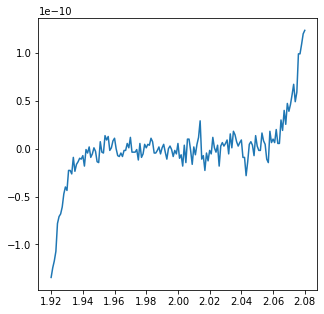

In [4]:
# II. Consider the polynomial
# p(x) = (x − 2)^9 = x^9 − 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512

# (a) Plot the polynomial p(x) for x in [1.920, 2.080] for step-sizes of delta(x) = 0.001 using the right-hand side of the expression above
import matplotlib.pyplot as plt
import math

x = np.arange(start = 1.920, stop = 2.080, step = 0.001)
y1 = x**9 - 18*x**8 + 144*x**7 - 672*x**6 + 2016*x**5 - 4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512

fig1 = plt.figure()
plt.plot(x,y1)

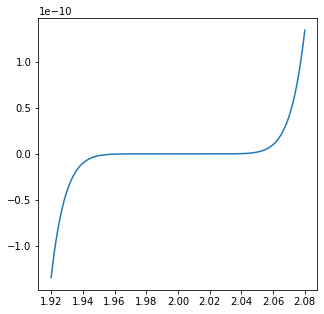

In [100]:
# (b) Plot the polynomial again over the same interval using the left-hand side of the expression

y2 = (x-2)**9

fig2 = plt.figure()
plt.plot(x,y2)

In [ ]:
# III. Consider the conditioning of a matrix.
# (a) Construct a random matrix of size m x n where m > n. Study the condition number as a function of the size of the matrix.

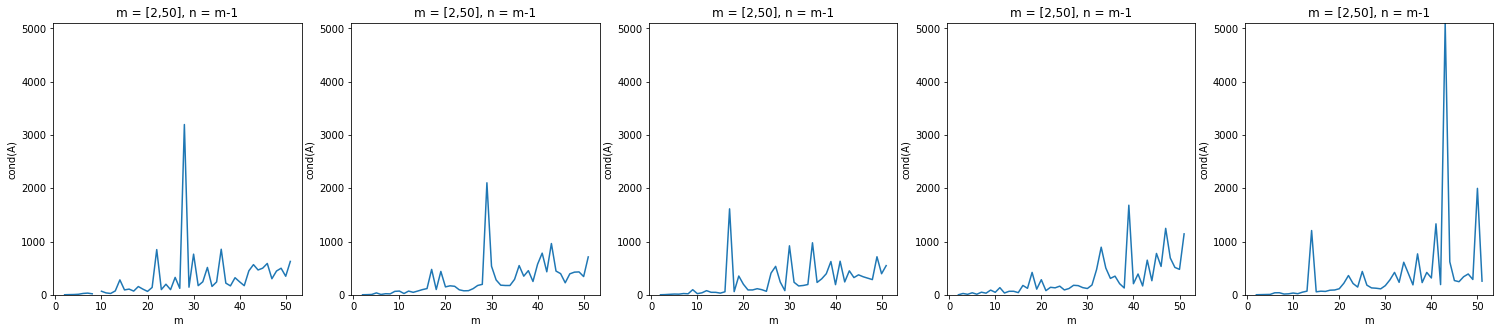

In [6]:
# Case 1: increasing n where m = n + 1

xmax = 50
ymax = 0

fig3, axs = plt.subplots(1,5, figsize=(20,5))

# Since we are generating random matrix A, 
# compare results of 5 trials plotting condition number as a function of m = [2:50]
for p in np.arange(5):
    cond = []
    m_vec = []  

    for i in np.arange(xmax):
        n = i + 1
        A = np.random.rand(n+1,n)
        cond_n = np.linalg.cond(A)
        #print(f"{cond_n} {A.shape}")
        m_vec.append(n+1)
        cond.append(cond_n)   

    cmax = np.amax(cond)

    if (cmax > ymax and not math.isinf(cmax)):
        ymax = cmax

    axs[p].plot(m_vec, cond)
    axs[p].set_title(f"m = [2,50], n = m-1")
    axs[p].set_xlabel("m")
    axs[p].set_ylabel("cond(A)")

plt.subplots_adjust(left=0,right=1)
plt.setp(axs, ylim=(0,ymax));




    

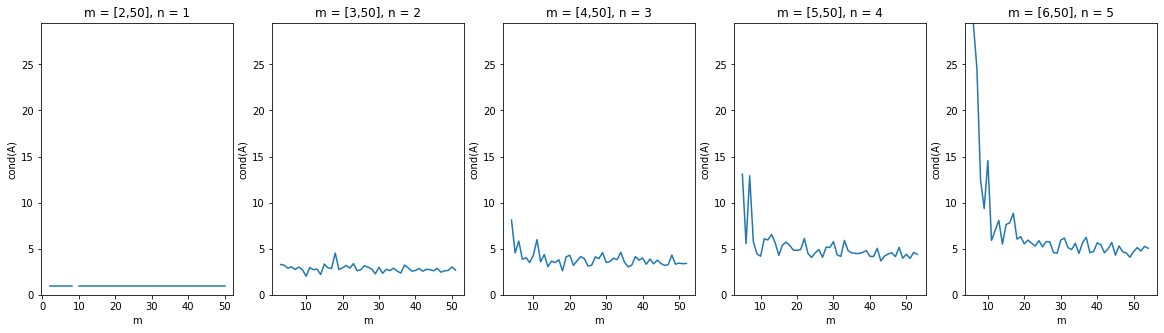

In [10]:
# Case 2: Fixed n, increase m

xmax = 50
ymax = 0

fig4, axs = plt.subplots(1,5, figsize=(20,5))

# plot condition number as a function of m = [n+1, 50]
for n in np.arange(5):
    cond = []
    m_vec = []  
    for i in np.arange(1,xmax):
        m = n + 1 + i
        A = np.random.rand(m,n+1)
        cond_n = np.linalg.cond(A)
        m_vec.append(m)
        cond.append(cond_n)   

    cmax = np.amax(cond)
    if (cmax > ymax and not math.isinf(cmax)):
        ymax = cmax
    
    axs[n].plot(m_vec, cond)
    axs[n].set_title(f"m = [{n+2},50], n = {n+1}")
    axs[n].set_xlabel("m")
    axs[n].set_ylabel("cond(A)")
plt.setp(axs, ylim = (0,ymax));


In [301]:
# (b) For a fixed m and n, copy the first column of A and append it as the (n+1)th column of A. What is the condition number and determinant of the matrix?

n = 50
m = n+1

# construct A (mxn)
A = np.random.rand(m,n)

# Append the first column of A as the n+1th column
A = np.hstack((A, np.reshape(A[:,0], (m,1))))

print(f"det(A) = {np.linalg.det(A)}")
print(f"cond(A) = {np.linalg.cond(A)}")



det(A) = 9.551787607344666e-12
cond(A) = 2.5524802162030115e+17


In [302]:
# (c) Take the appended (m+1)th column and add noise to it (epsilon) and see what happens to the condition number as a function of epsilon
print(f"cond(A_n0) = {np.linalg.cond(A)}")
for i in np.arange(10):

    A[:,n] = A[:,n] + np.random.rand(m)
    print(f"cond(A_n+{i+1}) = {np.linalg.cond(A)}")

cond(A_n0) = 2.5524802162030115e+17
cond(A_n+1) = 15207.937557506755
cond(A_n+2) = 25354.255712627353
cond(A_n+3) = 4192.914365873592
cond(A_n+4) = 16971.057050973523
cond(A_n+5) = 7875.658805838726
cond(A_n+6) = 6747.856585224975
cond(A_n+7) = 74532.81586338606
cond(A_n+8) = 8160.126238966461
cond(A_n+9) = 26056.58390764415
cond(A_n+10) = 12759.082493241678


In [ ]:
# From A_n0 to A_n1, the condition number decreases in size considerable from order 1e17 to 1e3. 
# Adding more noise does past A_n1 does not seem to produce a trend except that the condition number is now stable around order 1e3 to 1e4.